In [3]:
import time
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, dot, tensordot
from numpy.linalg import multi_dot
from interval import Interval

In [4]:
class TF:
    def __init__(self, n, d):
        self.index = n
        self.thickness = d
        
    def matrix(self, w):
        delta = 2*pi*(self.index)*(self.thickness)/w
        ita = self.index
        element = pd.DataFrame(
            {'e1':cos(delta), 'e2':1j/ita*sin(delta), 'e3':1j*ita*sin(delta), 'e4':cos(delta)}
        )
        matrix = np.reshape(element.values.reshape(1,-1), (np.size(w), 2, 2))
        return matrix

In [5]:
def Eq_dl(layer_2, layer_1, ns):
    eq = dot(
        [dot(layer_2[i], layer_1[i]) for i in range(np.size(target_w))],
        np.array([[1], [ns]]))
    d, _, _ = np.shape(eq)
    y = pd.DataFrame(np.reshape(eq, (d, 2)), columns = ['B','C'])
    Y = y['C']/y['B']
    return Y.values.reshape(d, 1)
    
def R(Eq, n0):
    r = (1-Eq)/(1+Eq)
    R = np.reshape(r*r.conjugate(), np.size(Eq))
    return np.real(R)

def FoM(r_hypo, r_target):
    M = sum((r_hypo-r_target))
    return M

def MonteCarlo(x, delta):
    delta = random.uniform(-delta, delta)
    return x + delta 
    

0.058393890938937904
[[287, 224]]


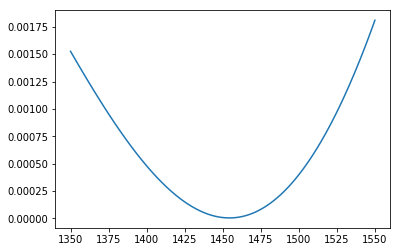

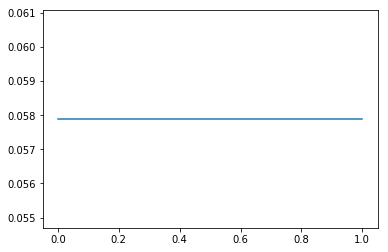

In [24]:
# parameter
target_w = np.linspace(1350,1550, 100)
target_R = np.zeros(np.size(target_w))
substrate = 1.8
m = np.size(target_w)
# initial value
d1 = 287
d2 = 224
layer1 = TF(2.1, d1).matrix(target_w)
layer2 = TF(1.42, d2).matrix(target_w)
pre_M = np.inf
merit = []
thickness = []
# iteration
for i in range(1000):
    if d1 in Interval(75, 500) and d2 in Interval(75, 500):
        layer1 = TF(2.1, d1).matrix(target_w)
        layer2 = TF(1.42, d2).matrix(target_w)
        R_hypo = R(Eq_dl(layer2, layer1, substrate), 1)
        M = FoM(R_hypo, target_R)
        if M < pre_M:
            merit.append(M)
            d1_fine = d1
            d2_fine = d2
            thickness.append([d1_fine, d2_fine])
            d1 = MonteCarlo(d1, 1)
            d2 = MonteCarlo(d2, 1)
            merit.append(M)
            pre_M = M
    else:
        d1 = MonteCarlo(d1, 1)
        d2 = MonteCarlo(d2, 1)
    
    

print(M)
print(thickness)
plt.plot(target_w, R_hypo)
plt.show()
plt.plot(range(np.size(merit)),merit)